<a href="https://colab.research.google.com/github/juandahur/ML-UdeA-Reto-Tec/blob/main/Reto_Tecnologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RETO TECNÓLOGICO
##Alejandro Correa - Juan David Hurtado 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [ ]:
airports = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airports.csv')
airports_freq = pd.read_csv('https://davidmegginson.github.io/ourairports-data/airport-frequencies.csv')
runways = pd.read_csv('https://davidmegginson.github.io/ourairports-data/runways.csv')
countries = pd.read_csv('https://davidmegginson.github.io/ourairports-data/countries.csv')
regions = pd.read_csv('https://davidmegginson.github.io/ourairports-data/regions.csv')
departures_MDE_nal = pd.read_csv('http://medata.gov.co/sites/default/files/medata_harvest_files/salida_mensual_pasajeros_aeropuertos_destino_nacional.csv')

In [ ]:
regions[regions['iso_country'] =='CO']

,id,code,local_code,name,continent,iso_country,wikipedia_link,keywords
675,303457,CO-AMA,AMA,Amazonas Department,SA,CO,https://en.wikipedia.org/wiki/Amazonas_Department,NaN
676,303458,CO-ANT,ANT,Antioquía Department,SA,CO,https://en.wikipedia.org/wiki/Antioquía_Depart...,NaN
677,303459,CO-ARA,ARA,Arauca Department,SA,CO,https://en.wikipedia.org/wiki/Arauca_Department,NaN
678,303460,CO-ATL,ATL,Atlántico Department,SA,CO,https://en.wikipedia.org/wiki/Atlántico_Depart...,NaN
679,303461,CO-BOL,BOL,Bolívar Department,SA,CO,https://en.wikipedia.org/wiki/Bolívar_Department,NaN
680,303462,CO-BOY,BOY,Boyacá Department,SA,CO,https://en.wikipedia.org/wiki/Boyacá_Department,NaN
681,303463,CO-CAL,CAL,Caldas Department,SA,CO,https://en.wikipedia.org/wiki/Caldas_Department,NaN
682,303464,CO-CAQ,CAQ,Caquetá Department,SA,CO,https://en.wikipedia.org/wiki/Caquetá_Department,NaN
683,303465,CO-CAS,CAS,Casanare Department,SA,CO,https://en.wikipedia.org/wiki/Casanare_Department,NaN
684,303466,CO-CAU,CAU,Cauca Department,SA,CO,https://en.wikipedia.org/wiki/Cauca_Department,NaN


In [ ]:
departures_MDE_nal

,"periodo;codigo;indicador;""valor"""
0,"200701;11001;salida_pax;""49588"""
1,"200701;13001;salida_pax;""5425"""
2,"200701;13430;salida_pax;""0"""
3,"200701;13468;salida_pax;""0"""
4,"200701;13688;salida_pax;""0"""
...,...
11305,"201906;85001;salida_pax;""233"""
11306,"201906;86885;salida_pax;""0"""
11307,"201906;91001;salida_pax;""1733"""
11308,"201906;95001;salida_pax;""0"""


#BASE DE DATOS AERONAÚTICA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

#origen_destino = pd.read_csv('/content/sample_data/BD.xlsx')
#ticket_dataset = pd.read_csv('/content/ticket_dataset_MOW.csv',sep=';')
origen_destino = pd.read_excel('/content/sample_data/BD.xlsx')
#ticket_dataset = pd.read_csv'https://drive.google.com/file/d/1VZPuwfLPABzCqKoVdx-NcT81wuhOXsM_/view?usp=sharing'


In [ ]:
origen_destino.head()

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
1,AVA,AVIANCA,2021-12-01,2021,12,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,67959.0,182750.0
2,AVA,AVIANCA,2021-11-01,2021,11,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,N,R,64290.0,169692.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0


In [ ]:
ticket_dataset.head(10)

NameError: ignored

##1. Agrupe los vuelos por ciudad de destino

In [ ]:
popularidad = origen_destino.groupby('Ciudad Destino').size().to_frame('Cuenta').reset_index()
popularidad.columns

Index(['Ciudad Destino', 'Cuenta'], dtype='object')

In [ ]:
popularidad.sort_values("Cuenta",ascending=False,inplace=True)
popularidad2 = popularidad.head(5)
popularidad2

,Ciudad Destino,Cuenta
60,BOGOTA,11687
360,RIONEGRO - ANTIOQUIA,3594
262,MITU,2606
79,CALI,2225
88,CARTAGENA,2119


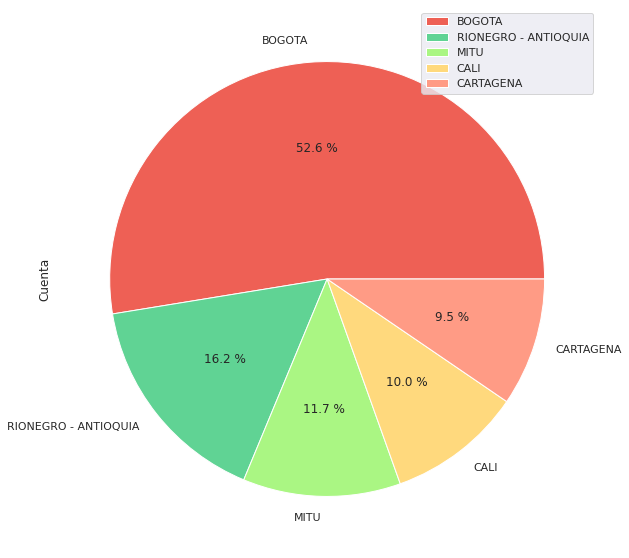

In [ ]:
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
popularidad2.plot(kind='pie', y='Cuenta',labels=popularidad2['Ciudad Destino'],autopct="%0.1f %%", colors= colores)

##2. Liste los vuelos por aerolínea con destino Rionegro

In [ ]:
Rionegro = origen_destino[origen_destino['Ciudad Destino'] == 'RIONEGRO - ANTIOQUIA']
Rionegro

,Sigla Empresa,Nombre,Fecha,Año,Número de Mes,Origen,Nombre.1,Ciudad Origen,Pais Origen,Destino,Nombre.2,Ciudad Destino,Pais Destino,Tráfico (N/I),Tipo Vuelo,Pasajeros,Carga + Correo (Kg)
0,AVA,AVIANCA,2021-12-01,2021,12,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,68743.0,345188.0
3,AVA,AVIANCA,2021-11-01,2021,11,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,63649.0,330573.0
4,AVA,AVIANCA,2021-10-01,2021,10,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,58747.0,206382.0
10,AVA,AVIANCA,2021-08-01,2021,8,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53850.0,191554.0
11,AVA,AVIANCA,2021-09-01,2021,9,BOG,BOGOTA - ELDORADO,BOGOTA,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,53213.0,208283.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63404,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,CLO,CALI - ALFONSO BONILLA ARAGON,CALI,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,N,R,0.0,18301.0
63408,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MAO,EDUARDO GOMES INTL,MANAUS,BRASIL,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,1420.0
63413,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,MIA,MIAMI INTL,MIAMI,ESTADOS UNIDOS,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,R,0.0,332872.0
63416,TPA,TAMPA CARGO S.A.S,2021-12-01,2021,12,SAL,EL SALVADOR INTL,SAN SALVADOR,EL SALVADOR,MDE,RIONEGRO - JOSE M. CORDOVA,RIONEGRO - ANTIOQUIA,COLOMBIA,I,C,0.0,928.0


In [ ]:
aerolineas = Rionegro.groupby('Nombre').size().to_frame('Cantidad de vuelos').reset_index()
aerolineas.sort_values('Cantidad de vuelos',ascending=False,inplace=True)
aerolineas2 = aerolineas.head(15)
aerolineas2


,Nombre,Cantidad de vuelos
12,AMERICAN,866
15,AVIANCA,519
5,AEROMEXICO SUCURSAL COLOMBIA,473
47,SPIRIT AIRLINES,344
31,JETBLUE AIRWAYS CORPORATION,285
21,FAST COLOMBIA SAS,177
10,AIR EUROPA,163
11,AIRES,108
30,INTEREJECUTIVA,100
42,SEARCA S.A.,55


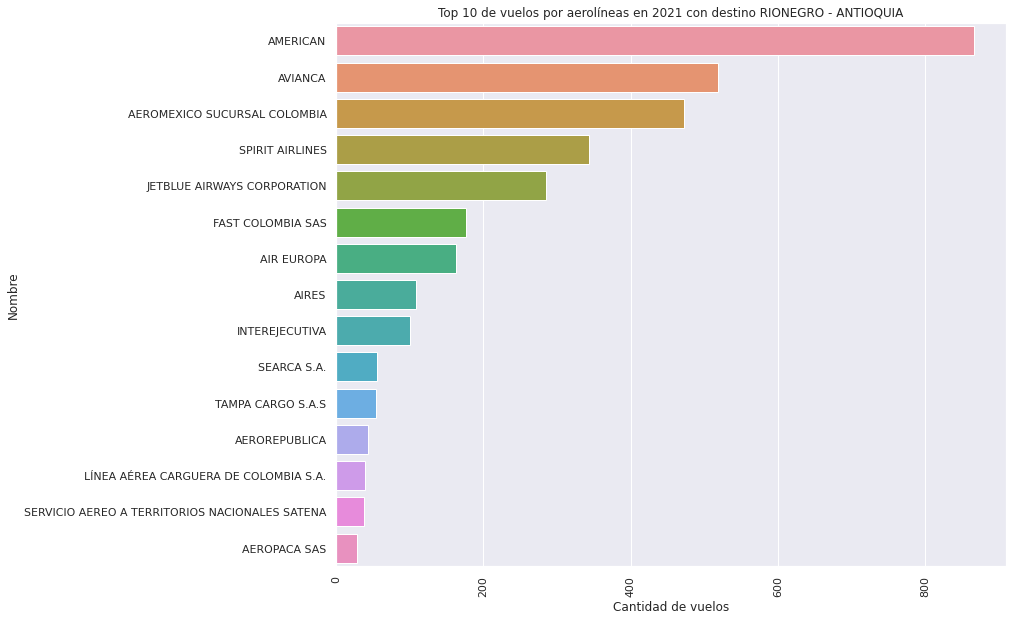

In [ ]:
sns.set(rc={"figure.figsize":(12,10)})
sns.barplot(x ="Cantidad de vuelos", y ="Nombre", data = aerolineas2)
plt.title("Top 10 de vuelos por aerolíneas en 2021 con destino RIONEGRO - ANTIOQUIA")
plt.xticks(rotation= 90);
plt.show()

##3. Listado de los vuelos por aerolínea , por la ciudad de destino, su cantidad de escalas, cantidad de pasajeros movilizados ordenados de mayor a menor y viceversa. El usuario debe elegir el orden de visualización. (Grafico de líneas)

In [ ]:
origen_destino[['Nombre','Fecha','Origen','Nombre.1','Pais Origen','Destino','Nombre.2','Pais Destino','Pasajeros']].sort_values('Pasajeros', ascending=False)

,Nombre,Fecha,Origen,Nombre.1,Pais Origen,Destino,Nombre.2,Pais Destino,Pasajeros
0,AVIANCA,2021-12-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,68743.0
1,AVIANCA,2021-12-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,67959.0
2,AVIANCA,2021-11-01,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,BOG,BOGOTA - ELDORADO,COLOMBIA,64290.0
3,AVIANCA,2021-11-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,63649.0
4,AVIANCA,2021-10-01,BOG,BOGOTA - ELDORADO,COLOMBIA,MDE,RIONEGRO - JOSE M. CORDOVA,COLOMBIA,58747.0
...,...,...,...,...,...,...,...,...,...
63436,TAC,2021-01-01,TBQ,TIMBIQUI,COLOMBIA,CLO,CALI - ALFONSO BONILLA ARAGON,COLOMBIA,NaN
63437,AEROMENEGUA,2021-04-01,MVP,MITU,COLOMBIA,MTN,BUENOS AIRES - VAUPES,COLOMBIA,NaN
63438,TURKISH AIRLINES INC,2021-08-01,ABJ,ABIDJAN,COSTA DE MARFIL,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN
63439,LAS,2021-10-01,LIM,CALLAO /INTL JORGE CHAVEZ,PERU,BOG,BOGOTA - ELDORADO,COLOMBIA,NaN
